# Inaugural Project

In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# import Household .py-file
from HouseholdSpecializationModel import HouseholdSpecializationModelClass as HHModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We use the code with defintions provided in the python-file "HouseholdSpecializationModel" in order to solve the model in the case where the parameter $\sigma=1$, making household consumption a Cobb-Douglas function. 

For this particular question, we are interested in the relationship between the hours worked at home for the female member and the male member of the household, namely $\frac{H_F}{H_M}$ and how it changes for different values of $\alpha$ and $\sigma$.

In order to investigate this, we make two arrays of the specified parameter values, and call the model solving process from the python-file so it loops for the $\alpha$ and $\sigma$ values in the arrays, thus creating nine values for the ratio of the hours worked at home. We then illustrate these results by creating a plot for each of the three $\sigma$ values.

Alpha     Sigma     HF/HM     


c:\Users\julie\OneDrive\1. Økonomi Københavns Universitet\Kandidat\1. semester\Python\projects-2023-mmj\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))


0.25      0.50      0.55      
0.50      0.50      1.00      
0.75      0.50      1.83      
0.25      1.00      0.31      
0.50      1.00      1.00      
0.75      1.00      3.25      
0.25      1.50      0.21      
0.50      1.50      1.00      
0.75      1.50      4.67      


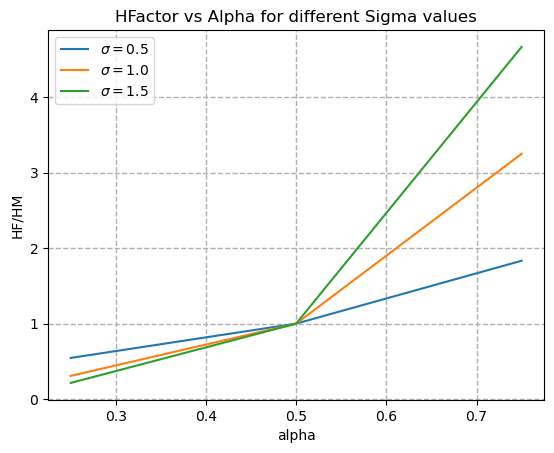

In [17]:
# make arrays of alpha and sigma parameters
alphas = np.array([0.25, 0.5, 0.75])
sigmas = np.array([0.5, 1.0, 1.5])

# make array of the ratio between HF and HM and filling it with zeros
HFactor = np.zeros(9)

# make array for the alphas and filling it with zeros
A = np.zeros(9)

# make an instance of the household model class
HH = HHModel()

# print header row of output
print(f"{'Alpha':<10}{'Sigma':<10}{'HF/HM':<10}")

# loop over sigmas and alphas 
i = 0
for sigma in sigmas:
    for alpha in alphas:
        HH.par.alpha = alpha
        HH.par.sigma = sigma
        result = HH.solve_discrete() # call the discrete solve method
        HFactor[i] = result.HF/result.HM # calculate home work ratio for male and female
        A[i] = alpha # save alpha value for the plots
        print(f"{alpha:<10.2f}{sigma:<10.2f}{HFactor[i]:<10.2f}") # Print the input and result as table rows
        i += 1

# create a plot showing how the home work ratio varies with alpha for the different sigma values
plt.plot(A[0:3], HFactor[0:3], label='$\sigma = 0.5$')
plt.plot(A[3:6], HFactor[3:6], label='$\sigma = 1.0$')
plt.plot(A[6:9], HFactor[6:9], label='$\sigma = 1.5$')
plt.xlabel("alpha")
plt.ylabel("HF/HM")
plt.title("HFactor vs Alpha for different Sigma values")
plt.legend()
plt.grid(linestyle = '--', linewidth = 1)
plt.show()

From these results it becomes apparent, that the ratio of hours worked at home by the female member relative to the male member increases drastically as $\alpha$ increases, which comes from the nature of the household consumption function. The parameter $\alpha$ can be interpreted as a measure of how productive the female member of the household is at these at-home work activities such as cleaning and cooking. It therefore makes sense, that it would be optimal for the household to have a greater share of these activities completed by the female, as the male member's time is would be wasted on this, if $\alpha$ is large. And if they are equally productive ($\alpha=0.5$), the optimal amount of hours worked at home will be the exact same $\left(\Rightarrow \frac{H_F}{H_M}=1\right)$.

The plot shows that as the size of $\sigma$ increases, the kink in the curve becomes more significant. The explanation is again found in the household consumption, where the parameter $\sigma$ will further amplify the allocation of hours worked at home given the productivity.

# Question 2

For this question, we are now interested in seeing the relationship between hours working at home and the wages from working in the market, namely plotting $\log\frac{H_F}{H_M}$ against $\log\frac{w_F}{w_M}$. We therefore have to set up arrays for $w_F$ and the two log ratios. We then use the code given in HouseholdSpecializationModel as in Q1 and call the discrete solve method. 

log(wF/wM)  log(HF/HM)  
-0.22       0.22        
-0.11       0.00        
0.00        0.00        
0.10        -0.12       
0.18        -0.22       


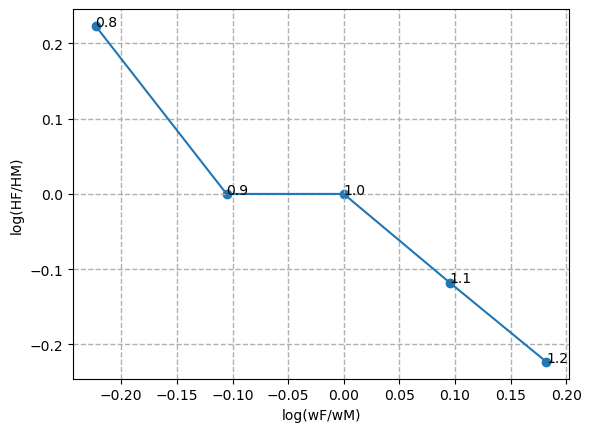

In [22]:
# make an array of w_F
wages_f = np.array([0.8,0.9,1.0,1.1,1.2])

# make arrays of log(wF/wM) and log(HF/HM) and filling it with zeros
logw_ratio = np.zeros(5)
logH_ratio = np.zeros(5)

# create new instance of the household model class
HH2 = HHModel()

# loop over wF
for i, wage_f in enumerate(wages_f): 
    HH2.par.wF = wage_f
    result = HH2.solve_discrete() # call the discrete solve method
    logw_ratio[i] = math.log(wage_f / HH2.par.wM) # calculate log(wF/wM)
    logH_ratio[i] = math.log(result.HF/result.HM) # calculate log(HF/HM)

# define and print column headers
header = ['log(wF/wM)', 'log(HF/HM)']
print(f"{header[0]:<12}{header[1]:<12}")
for w_ratio, H_ratio in zip(logw_ratio, logH_ratio):
    print(f"{w_ratio:<12.2f}{H_ratio:<12.2f}")

# make a scatter plot 
plt.scatter(logw_ratio,logH_ratio) 
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
for i, txt in enumerate(wages_f):
    plt.annotate(txt, (logw_ratio[i], logH_ratio[i])) # annotate each data point with the corresponding value of wF
plt.grid(linestyle = '--', linewidth = 1)
plt.plot(logw_ratio,logH_ratio)
plt.show()

The scatter plot show that when women receive higher wage than men, they work less hours at home, since it is more attractive to spend hours earning the higher wage. 

# Question 3

For this question we repeat the same as in Q2, however now in continuous time. This is done by changing the discrete code from HouseholdSpecializationModel to continuous time.



[-0.22314355 -0.10536052  0.          0.09531018  0.18232156] [ 2.23153273e-01  1.05368268e-01  5.89691763e-06 -9.53086198e-02
 -1.82307387e-01]


/Users/mariusmouritzen/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


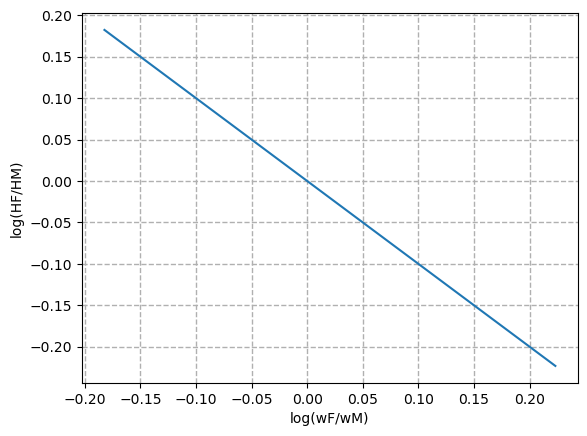

In [ ]:
HH3 = HHModel()

# loop over wage_f
for i, wage_f in enumerate(wages_f): 
    HH3.par.wF = wage_f
    result = HH3.solve() # call the solve method for continous model
    logw_ratio[i] = math.log(wage_f / HH3.par.wM) 
    logH_ratio[i] = math.log(result.HF/result.HM) 
print(logw_ratio,logH_ratio) 

# plot the result
plt.plot(logH_ratio, logw_ratio)
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.grid(linestyle = '--', linewidth = 1)
plt.show()


The change from discrete to continuous values shows the same result as Q2, but is now more smoothed out, since we have more specified values. The relationship is almost negatively linear now, almost like a regression line of the scatter plot in Q2.

# Question 4

For the given values of $\beta_0$ and $\beta_1$, we now attempt to derive the values of $\alpha$ and $\sigma$, which will minimize $(\beta_0-\hat{\beta}_0)^2+(\beta_1-\hat{\beta}_1)^2$. In order to do this we make a list containing the relevant parameters, namely the error we will minimize as well as estimates for $\alpha$, $\sigma$, $\hat{\beta}_0$ and $\hat{\beta}_1$. This is done over multiple tries, where the interval becomes progressively more narrow as the estimates are derived.

In [ ]:
HH4 = HHModel()

# define a function 
def FindOptimum():
    error_list = [] # make an empty list
    for alpha in alphas: # loop over alphas and sigmas
        for sigma in sigmas:
            HH4.par.alpha = alpha
            HH4.par.sigma = sigma
            HH4.solve_wF_vec() # call the solve model for vector of female wages
            HH4.run_regression() # call the run regression method
            beta0hat = HH4.sol.beta0
            beta1hat = HH4.sol.beta1
            error = (beta0-beta0hat)**2+(beta1-beta1hat)**2 # calculate the squared difference between the betas and betahats
            error_list.append((error,alpha,sigma,beta0hat,beta1hat))
    print(min(error_list))
    return error_list

# define beta values from data
beta0 = 0.4 
beta1 = -0.1 

# make arrays of alpha and sigma values
alphas = np.linspace(0.1, 1.0, 10)
sigmas = np.linspace(0.1, 1.5, 15)

# call the function finding the optimum (first try)
print('First try:')
FindOptimum()

# make new arrays for alpha and sigma, narrowing the values
alphas = np.linspace(0.8, 1.0, 11)
sigmas = np.linspace(0.05, 0.25, 11)

# call the function finding the optimum (second try)
print('Second try:')
FindOptimum()

# make new arrays for alpha and sigma, narrowing the values even further
alphas = np.linspace(0.96, 1.0, 17)
sigmas = np.linspace(0.05, 0.15, 11)

# extract the minimum error from the optimum function (third try)
print('Third try:')
err = FindOptimum()
err = min(err) 


First try:


c:\Users\julie\OneDrive\1. Økonomi Københavns Universitet\Kandidat\1. semester\Python\projects-2023-mmj\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
c:\Users\julie\OneDrive\1. Økonomi Københavns Universitet\Kandidat\1. semester\Python\projects-2023-mmj\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
c:\Users\julie\OneDrive\1. Økonomi Københavns Universitet\Kandidat\1. semester\Python\projects-2023-mmj\inauguralproject\HouseholdSpecializationModel.py:172: RuntimeWarning: divide by zero encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)


(0.011554431670754556, 0.9, 0.2, 0.43944521028557626, -0.19999253500277522)
Second try:
(0.0008891970464853569, 0.98, 0.11, 0.4281023025160446, -0.10997284511972749)
Third try:
(7.796699862543554e-06, 0.9824999999999999, 0.09999999999999999, 0.40279223938108055, -0.09999004503708839)


We first find the optimum for the interval of $\alpha$ between 0.1 and 1.0 in intervals of 0.1, and $\sigma$ between 0.1 and 1.5 in intervals of 0.1. This gives a value of 0.012 for the sum of the squared errors, $\alpha$ = 0.9, $\sigma$ = 0.2, $\beta_0$ = 0.439 and $\beta_1$ = -0.200.
Since these value are not exact to the data values we try to narrow down the intervals twice. Thus, we use $\alpha$ between 0.95 and 1 in intervals of 0.005 and $\sigma$ between 0.05 and 0.15 in interval of 0.01. Now the sum of the squared errors is 0.0001, $\alpha$ = 0.975, $\sigma$ = 0.11, $\beta_0$ = 0.403 and $\beta_1$ = -0.110 as shown by the output from the third try. 

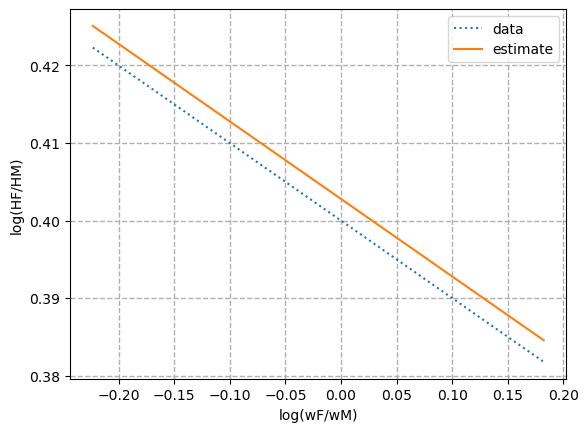

In [ ]:
# make arrays full of zeros 
estimate = np.zeros(len(wages_f))
estimatehat = np.zeros(len(wages_f))

# define beta estimates
beta0hat = err[3]
beta1hat = err[4]

# loop over wages_f
for i, wage in enumerate(wages_f):
    estimate[i] = beta0+beta1*(math.log(wage/HH4.par.wM)) # Calculate log(HF/HM) for beta0 and beta1
    estimatehat[i] = beta0hat+beta1hat*(math.log(wage/HH4.par.wM)) # Calulate log(HF/HM) for new beta values

# plot the wages against data and estimate values
plt.plot(logw_ratio, estimate, ':', label= 'data')
plt.plot(logw_ratio, estimatehat, '-', label= 'estimate')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.legend()
plt.grid(linestyle = '--', linewidth = 1)
plt.show()

Plotting the regressions; one of the $\beta_0$ and $\beta_1$ data value and and one of the estimated $\beta_0$ and $\beta_1$ values. This shows that the estimate deviates with approximately 0.003 $\log(H_F/H_M)$ for a given value of $\log(w_F/w_M)$. By working on this question with different intervals, the results suggest that the estimate gets closer to the data when the interval becomes more narrow, such that they eventually are identical.

The data (and our estimate) shows that there exists a negative relationship ($\beta_1<0$) between $\log(H_F/H_M)$ and $\log(w_F/w_M)$, which makes good sense as a woman would use fewer hours working at home if her wage is higher relative to the man in the household and vice versa. The estimated result from the article of $\beta_0>1$ indicates that if wages are equal ($\log(w_F/w_M)=0$), then the woman would still use more hours working at home. This finding is reflected by the $\alpha$ we obtain when estimating our model to the data as $\alpha\approx0.9825$, i.e. women are way more productive in home production than men.

# Question 5

We now assume that men and women are equally productive, meaning that $\alpha=0.5$. In order to investigate how the the model now fit the data (under this assumption), we need to make an extension to the model.

An extension could be to take into account the wage gap between men and women on the labor market, which is primarily caused by biological differences between the genders. This wage difference could be implemented in the model such that a woman has to work more in order to contribute to total consumption as much as the man does by a given amount of hours. The consumption could instead be defined as:

$$C=w_ML_M+\phi(w_FL_F)\,,\quad\phi<1\,,$$

where the size of $\phi$ implies that women's wages are lower. The wage gap worldwide is estimated to be around 23%, so for this question we will use the following approximation: $\phi\approx0.77$. The $\phi$ has been added to equation the py-file "HouseholdSpecializationModel" such that the parameter just has been equal to one up until this point. 

We estimate $\beta_0$ and $\beta_1$ once again for the values of $\alpha$ and $\phi$ and compare it to the data in plot.

In [ ]:
# Make new instance of the household model
HH5 = HHModel()

# estimate model with alpha = 0.5 and phi = 1
HH5.estimate(alpha=0.5, phi=1)

# print results
print(f'beta0hat1 = {HH5.sol.beta0.round(5)}')
print(f'beta1hat1 = {HH5.sol.beta1.round(5)}')

# save results for plot
beta0hat1 = HH5.sol.beta0
beta1hat1 = HH5.sol.beta1

# estimate model with alpha = 0.5 and phi = 0.77
HH5.estimate(alpha=0.5, phi=0.77)

# print results
print(f'beta0hat2 = {HH5.sol.beta0.round(5)}')
print(f'beta1hat2 = {HH5.sol.beta1.round(5)}')

# save results for plot
beta0hat2 = HH5.sol.beta0
beta1hat2 = HH5.sol.beta1

c:\Users\julie\OneDrive\1. Økonomi Københavns Universitet\Kandidat\1. semester\Python\projects-2023-mmj\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: overflow encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**((par.sigma)/(par.sigma-1))
c:\Users\julie\OneDrive\1. Økonomi Københavns Universitet\Kandidat\1. semester\Python\projects-2023-mmj\inauguralproject\HouseholdSpecializationModel.py:65: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)


beta0hat1 = -0.0
beta1hat1 = -0.09951
beta0hat2 = 0.04995
beta1hat2 = -0.19111


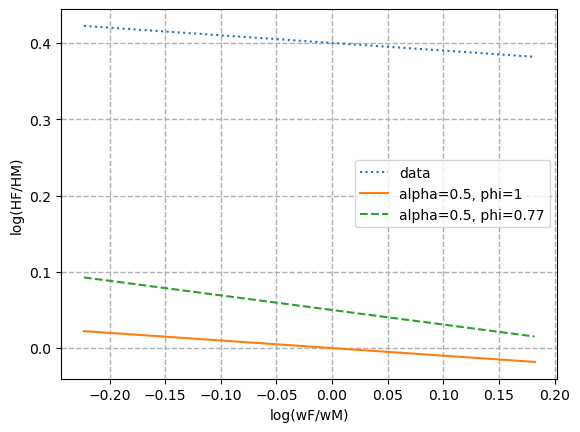

In [ ]:
# make arrays full of zeros 
estimate1 = np.zeros(len(wages_f))
estimate2 = np.zeros(len(wages_f))

# loop over wages_f
for i, wage in enumerate(wages_f):
    estimate[i]= beta0+beta1*(math.log(wage/HH5.par.wM))
    estimate1[i] = beta0hat1+beta1hat1*(math.log(wage/HH5.par.wM)) # Calculate log(HF/HM) for beta0 and beta1
    estimate2[i] = beta0hat2+beta1hat2*(math.log(wage/HH5.par.wM)) # Calulate log(HF/HM) for new beta values

# plot the wages against data and estimate values
plt.plot(logw_ratio, estimate, ':', label='data')
plt.plot(logw_ratio, estimate1, '-', label= 'alpha=0.5, phi=1')
plt.plot(logw_ratio, estimate2, '--', label= 'alpha=0.5, phi=0.77')
plt.xlabel('log(wF/wM)')
plt.ylabel('log(HF/HM)')
plt.legend()
plt.grid(linestyle = '--', linewidth = 1)
plt.show()

The plot shows that with the assumption of $\alpha=0.5$ without the model extension, $\beta_0$ becomes zero and the line shifts downwards in the plot. This result indicates the fact that equal productivity in home production means that the time spent working at home are equal for male and female if they earn the same wage ($\log(H_F/H_M)=0$ for $\log(w_F/w_M)$=0). The slope however is quite similar to the data as different wages do not affect the relationship between hours worked at home, because they are equally productive, which is very different to the result we found in question 4. 

When we introduce the parameter value $\phi\approx0.77$ in the consumption equation, we find that the woman works relatively more at home (as $\beta_0$ increases) even though the two genders are equally productive, because it basically means that women are "less productive" in the labor market, as they earn a lower wage for the same amount of work. So in that sense, the model extension creates estimates that are closer to the data for $\beta_0$, but the slope of the new line is a little steeper than before. This could be the case due to the woman's wages being less important for consumption and thus utility and creates a stronger negative relationship between $\log(H_F/H_M)$ and $\log(w_F/w_M)$.

Ultimately the model extension does not help that much to fit the data when $\alpha=0.5$. This could be because the model extension is not comprehensive enough by design and/or because the parameter change is not big enough. For example could a change in preference through $\epsilon$ or $\omega$ perhaps have shifted the curve upwards and closer to the data when finding the optimum. On the other hand could it be argued that a bigger change is needed than just the 23% to account for the difference in wages, because only some of the difference between the data line and the model line is removed via the extension. But as the slope of the line also changes, it could end up producing a misleading relationship between the two variables.